In [12]:
# Import dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Read in csv file
data = Path('3X-Tripled_Dataset_With_Unique_Employee_IDs- tai.csv')
work_life_df = pd.read_csv(data)
work_life_df.head(10)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,43,7,2,Medium,Depression,No,Decrease,4,Satisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,48,4,1,Medium,Anxiety,No,Increase,2,Unsatisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,43,11,5,Medium,Anxiety,No,No Change,4,Satisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,59,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,57,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,50,3,4,High,NaN,No,Increase,2,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,25,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,22,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,45,4,2,High,NaN,Yes,Decrease,1,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,45,6,1,Low,Depression,Yes,Decrease,1,Unsatisfied,1,Weekly,Poor,North America


In [14]:
# Show columns in dataset
print(work_life_df.columns)

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


## Decision Tree Model

Decision Tree Model Accuracy: 0.777
Confusion Matrix:
 [[794 113 113]
 [127 759 117]
 [ 87 112 778]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1020
           1       0.77      0.76      0.76      1003
           2       0.77      0.80      0.78       977

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



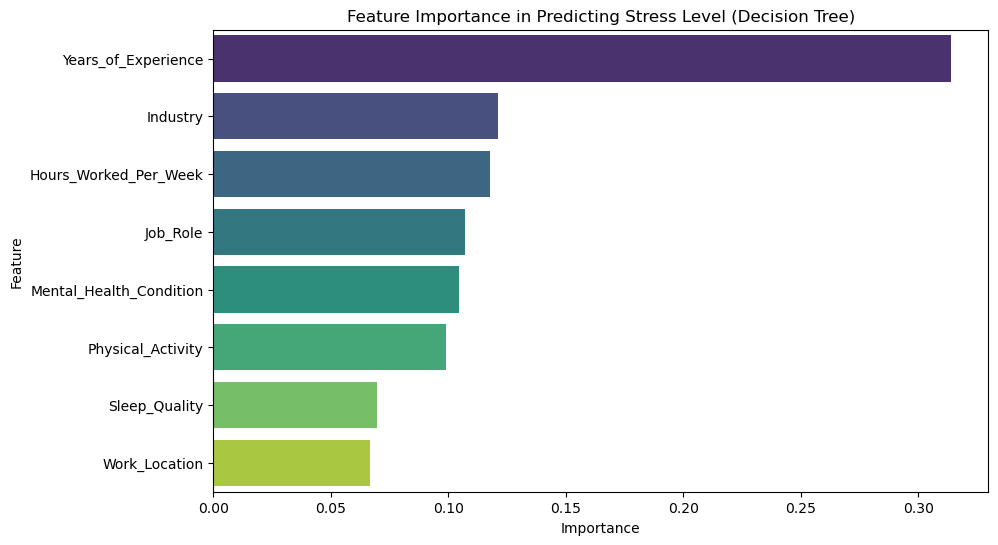

In [15]:
# # Import dependencies
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Define features and target
features = ['Job_Role', 'Industry', 'Hours_Worked_Per_Week', 'Work_Location', 
            'Mental_Health_Condition', 'Physical_Activity', 'Sleep_Quality', 'Years_of_Experience']
target = 'Stress_Level'

# Encode categorical variables 
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le

# Make sure 'Stress_Level' is encoded 
if work_life_df[target].dtype == 'object':
    work_life_df[target] = LabelEncoder().fit_transform(work_life_df[target])

# Split the data into training and testing sets
X = work_life_df[features]
y = work_life_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Report
print("Decision Tree Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Create a Feature Importance Visualization Graph
feature_importances = pd.DataFrame({'Feature': features, 'Importance': dt_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Predicting Stress Level (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Decision Tree Model 2 with all variables

In [18]:
# Define the features and target
features = ['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience', 
            'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 
            'Work_Life_Balance_Rating', 'Mental_Health_Condition', 
            'Access_to_Mental_Health_Resources', 'Productivity_Change', 
            'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work', 
            'Company_Support_for_Remote_Work', 'Physical_Activity', 
            'Sleep_Quality', 'Region']
target = 'Stress_Level'


In [19]:
# Encode Variables
label_encoders = {}
for column in features:
    if work_life_df[column].dtype == 'object':
        le = LabelEncoder()
        work_life_df[column] = le.fit_transform(work_life_df[column])
        label_encoders[column] = le

# Make sure 'Stress_Level' is encoded 
if work_life_df[target].dtype == 'object':
    work_life_df[target] = LabelEncoder().fit_transform(work_life_df[target])


In [20]:
# Split the data into training and testing sets
X = work_life_df[features]
y = work_life_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)


In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Decision Tree Model Accuracy: 0.9406666666666667
Confusion Matrix:
 [[965  35  20]
 [ 28 940  35]
 [ 27  33 917]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1020
           1       0.93      0.94      0.93      1003
           2       0.94      0.94      0.94       977

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



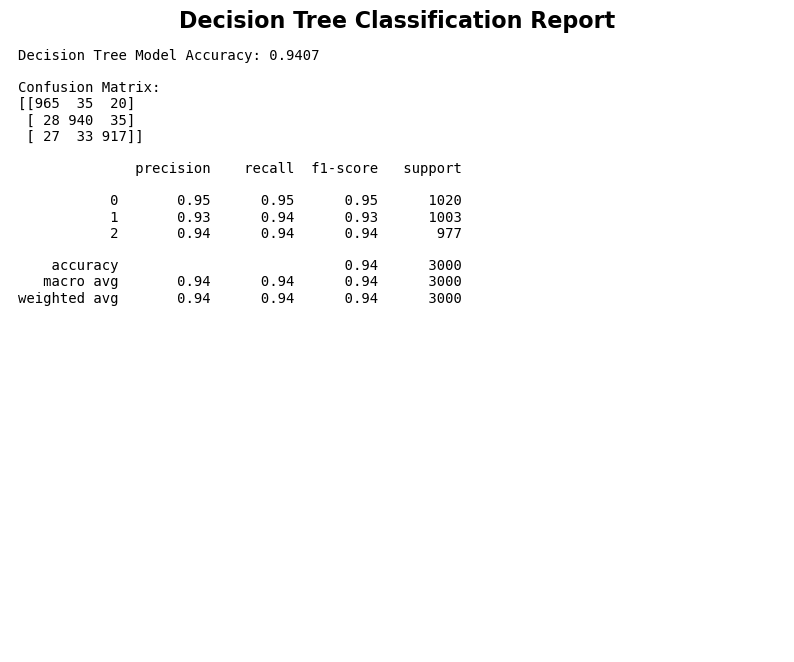

In [24]:
# Print Results
print("Decision Tree Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Concatenate the report details for display
overall_report = f"Decision Tree Model Accuracy: {accuracy:.4f}\n\n"
overall_report += f"Confusion Matrix:\n{conf_matrix}\n\n"
overall_report += class_report

# Plot the report as an image 
plt.figure(figsize=(10, 8))  
plt.text(0.01, 0.98, overall_report, fontsize=10, va='top', ha='left', fontfamily='monospace')
plt.axis('off') 
plt.title("Decision Tree Classification Report", color='black', fontsize=16, fontweight='bold')

# Save the plot 
plt.savefig("decision_tree_classification_report.png", bbox_inches='tight', pad_inches=0.5, dpi=300)
plt.show()

In [25]:
# Create a Feature Importance Visualization Graph
feature_importances = pd.DataFrame({'Feature': features, 'Importance': dt_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

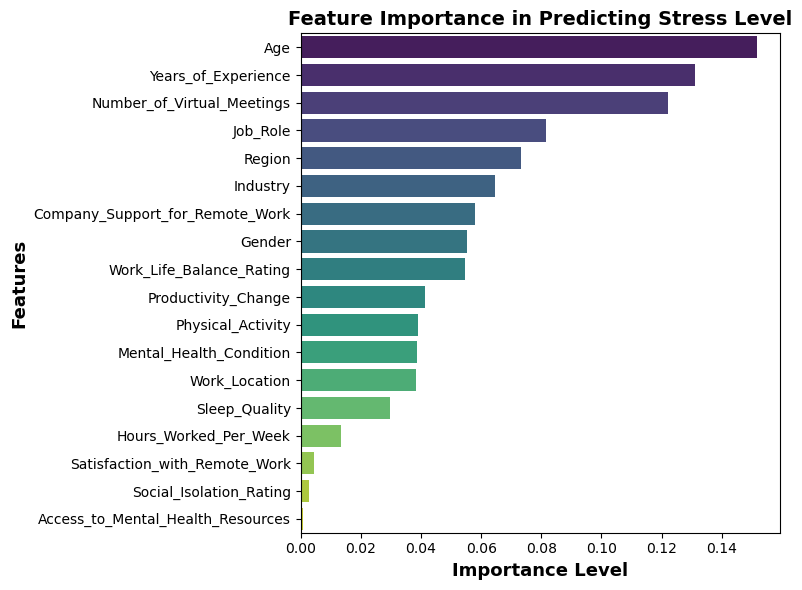

In [26]:
# Plot Graph
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Predicting Stress Level", color='black', fontsize=14, fontweight='bold')
plt.xlabel("Importance Level", color='black', fontsize=13, fontweight='bold')
plt.ylabel("Features", color='black', fontsize=13, fontweight='bold')
plt.tick_params(colors='black') 
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.tight_layout()
plt.savefig('feature_importance_decision_tree_graph')
plt.show()